In [33]:
import os
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

np.random.seed(40)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)
sklearn.set_config(print_changed_only=True)

In [34]:
def criterion(pred, y):
    t_pred = np.exp(pred) - 1
    t_y = np.exp(y) - 1
    dy = np.abs(t_pred - t_y) / t_y
    mape = np.sum(dy) / len(t_y)
    acc = len(dy[dy <= 0.05]) / len(t_y)
    return 0.2 * (1 - mape) + 0.8 * acc

In [35]:
model_path = 'pricePrediction.csv'
model_df = pd.read_csv(model_path)
model_df.drop(columns=['Unnamed: 0', 'carid'], inplace=True)
model_df.T

,0,1,2,3,4,5,6,7,8,9,...,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998
price,1.656321,2.125848,0.693147,1.682688,1.931521,0.912283,0.262364,1.938742,0.779325,1.788421,...,3.642836,2.580217,1.757858,2.433613,2.549445,0.631272,2.230014,1.791759,3.367296,2.985682
XGBandRFR,1.719926,2.271145,0.964622,1.711960,2.102266,1.035949,0.657294,2.058457,1.209295,1.921566,...,3.622933,2.598819,1.730852,2.318713,2.542335,0.819303,2.234357,1.760595,3.255750,2.971433
RFRandRFR,1.716097,2.233638,0.956291,1.710808,2.085583,1.009515,0.647710,1.996585,1.190171,1.920652,...,3.619411,2.594270,1.712281,2.301422,2.538961,0.850326,2.248477,1.726480,3.254660,2.938987
RFR,1.725861,2.276669,0.942762,1.725213,2.099926,1.049692,0.673198,2.053051,1.215877,1.933570,...,3.620800,2.583042,1.745576,2.316247,2.545150,0.801166,2.237081,1.757083,3.260381,2.952850
XGB,1.736768,2.166878,1.027650,1.686340,2.035399,1.060185,0.611070,1.948325,1.119354,1.926875,...,3.610033,2.498115,1.766427,2.278075,2.578137,0.697907,2.274182,1.741592,3.247824,2.930153
GBR,1.712011,2.273598,1.028483,1.789496,2.054653,1.128961,0.627632,2.008010,1.164310,1.959519,...,3.591229,2.528984,1.735533,2.294488,2.559916,0.716819,2.250075,1.696793,3.277717,2.863479
ETRandRFR,1.679568,2.255500,0.874458,1.814693,2.101531,1.032066,0.563891,2.045052,1.255559,1.898750,...,3.635324,2.579048,1.693473,2.288065,2.541887,0.823529,2.234670,1.685483,3.346350,2.979403
GBR_enhanced,1.758285,2.209248,0.990365,1.686031,2.061850,1.030552,0.623799,1.973590,1.149073,1.984678,...,3.614376,2.537521,1.724825,2.299503,2.553046,0.751287,2.241802,1.757721,3.277700,2.968505
XGB_enhanced,1.720909,2.267891,1.084428,1.665126,2.126209,1.144099,0.707509,1.973417,1.074632,1.980507,...,3.622365,2.496835,1.666535,2.348758,2.533249,0.644562,2.262532,1.933332,3.210483,2.890170
RFR_enhanced,1.714261,2.292465,0.972089,1.734278,2.107336,1.005366,0.677330,2.062516,1.213936,1.920828,...,3.624297,2.582693,1.729817,2.313235,2.532426,0.778156,2.232073,1.747317,3.251088,2.940060


In [36]:
# model_path = 'pricePrediction.csv'
# model_df = pd.read_csv(model_path)
# model_df.drop(columns=['Unnamed: 0', 'carid', 'RFRandRFR', 'XGBandRFR', 'RFR_enhanced'], inplace=True)
# model_df

In [37]:
X = model_df.drop(columns='price').to_numpy()
y = model_df['price'].values

In [38]:
model = LinearRegression()
model.fit(X, y)
model.coef_

array([-0.08571374, -0.15016072,  0.30875459,  0.02515592,  0.0922667 ,
        0.25125403,  0.495686  ,  0.10418013, -0.20033099,  0.16960514])

100%|██████████| 30/30 [00:15<00:00,  1.94it/s]

alpha: 0.022972275360711513
weights: [-0.08051982 -0.07670803  0.2678177  -0.00288027  0.05312506  0.23332451
  0.53373099  0.09852843 -0.22311371  0.19603283]


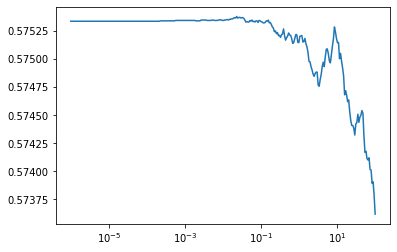

In [39]:
alpha_result = {'alpha': [], 'score': [], 'weight': []}
for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    for alpha in np.logspace(-6, 2, 300):
        model = Ridge(alpha = alpha, fit_intercept=False)
        model.fit(X_train, y_train)
        pred_y = model.predict(X_test)
        alpha_result['alpha'].append(alpha)
        alpha_result['score'].append(criterion(pred_y, y_test))
        alpha_result['weight'].append(model.coef_)
        
result = pd.DataFrame(alpha_result)
alpha_result['weight'] = np.stack(alpha_result['weight'])
result = result.groupby('alpha').mean()
x = np.logspace(-6, 2, 300)
y_score = result['score'].values
plt.plot(x, y_score)
plt.xscale('log')

print('alpha:', np.logspace(-6, 2, 300)[y_score.argmax()])
print('weights:', alpha_result['weight'][y_score.argmax()])

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# model = Ridge(alpha = 6.751984523072501, fit_intercept=False)
# model.fit(X_train, y_train)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = Ridge(alpha = np.logspace(-6, 2, 300)[y_score.argmax()], fit_intercept=False)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
criterion(pred_y, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [29999, 10]

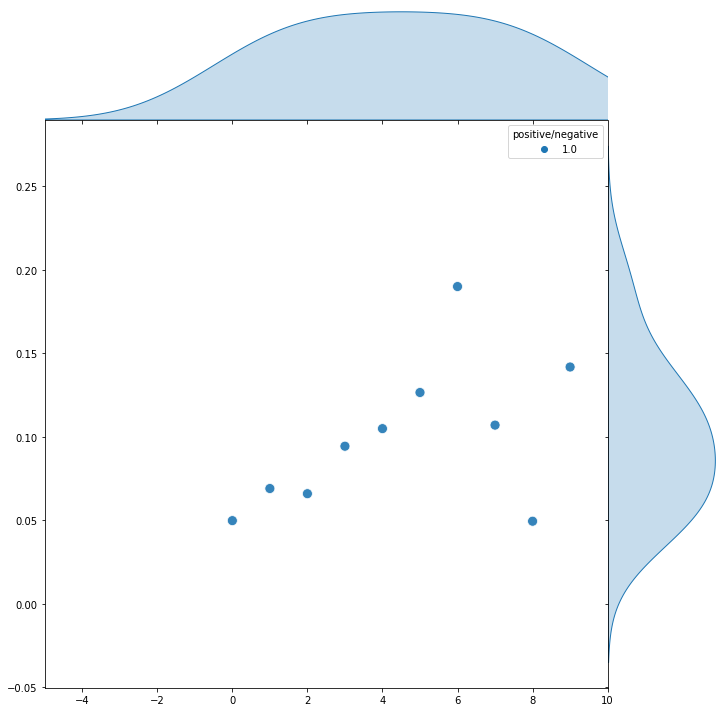

In [42]:
x = np.arange(X_train.shape[1])
y = model.coef_
c_sign = np.sign(model.coef_)

palette = {
    -1: 'tab:red',
    0: 'tab:green',
    1: 'tab:blue',
}

plt_df = pd.DataFrame({'x': x, 'y': y, 'positive/negative': c_sign})
g = sns.jointplot(x, y, data=plt_df, xlim = (-5, 10), height = 10, hue='positive/negative', space=0, palette=palette, s = 100, alpha = 0.9)


In [43]:
a = np.array([0.02565457, 0.03410536, 0.07077384, 0.19386866, 0.39652538, 0.0982651, 0.18080708999999995]).sum()
1 - a

0.0